# PRODUCT RECOMMENDATION SYSTEM

## The primary aim of this project is to develop a robust and effective product recommendation system for Nykaa-an online beauty and wellness retailer.
Link to the dataset-https://www.kaggle.com/datasets/promptcloud/nykaa-product-review

### Data Cleaning and Preparation

In [1]:
import pandas as pd
#reading the dataset and displaying the first few rows
df = pd.read_csv('Nykaa_Product_Review.csv')
print(df.head())
#printing the shape
print(df.shape)

                         Product Id Product Brand Code   Retailer  \
0  b77f3da33be6e65f6183da6ada8c07ca             BZ1000  nykaa.com   
1  f54658c5d511195b6621a640fb743b1b             BH5931  nykaa.com   
2  cdf6b3387f8976c8e38ad150173dbb6d             BH7276  nykaa.com   
3  424755c11c78b2b24ff13c675baf5d19             BZ1000  nykaa.com   
4  f7f76573099db0058ef5264c35d9d02e             BZ1000  nykaa.com   

                                Product Category    Product Brand  \
0                        Makeup > Face > Contour      ETUDE HOUSE   
1                          Brand > L'Oreal Paris    L'Oreal Paris   
2                     Makeup > Face > Foundation    The Body Shop   
3  Health & Wellness > Good for You > Super Food    True Elements   
4                      Makeup > Lips > Lip Stain  Nykaa Cosmetics   

                                        Product Name Product Price  \
0                ETUDE HOUSE Face Color Shading - 02           600   
1  L'Oreal Paris Glow Mon Amou

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Id               625 non-null    object 
 1   Product Brand Code       625 non-null    object 
 2   Retailer                 625 non-null    object 
 3   Product Category         544 non-null    object 
 4   Product Brand            625 non-null    object 
 5   Product Name             625 non-null    object 
 6   Product Price            625 non-null    object 
 7   Product Url              610 non-null    object 
 8   Market                   625 non-null    object 
 9   Product Description      625 non-null    object 
 10  Product Currency         625 non-null    object 
 11  Product Image Url        625 non-null    object 
 12  Product Tags             610 non-null    object 
 13  Product Contents         324 non-null    object 
 14  Product Rating           5

In [3]:
print(df.columns)

Index(['Product Id', 'Product Brand Code', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')


#### As the dataset has many columns,we keep only the relevant columns

In [4]:
# Keeping only relevant columns
columns_to_keep = ['Product Brand', 'Product Category', 'Product Description', 'Product Price', 'Product Reviews Count', 'Product Rating','Product Name']
df_clean= df[columns_to_keep]

In [5]:
# Renaming columns for easier access
df_clean.columns = ['Brand', 'Category', 'Description', 'Price', 'Review Count', 'Rating','Name']

In [6]:
#converting the columns to numeric data types
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df_clean['Review Count'] = pd.to_numeric(df_clean['Review Count'], errors='coerce')
df_clean['Rating'] = df_clean['Rating'].replace('No rating available', None)
df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')

C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\2192653162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\2192653162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Review Count'] = pd.to_numeric(df_clean['Review Count'], errors='coerce')
C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\2192653162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [7]:
# Dropping rows with missing values
df_clean.dropna(inplace=True)

C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\4205114689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


In [8]:
# Displaying the cleaned dataframe
print(df_clean.info())
print(df_clean.head())
print(df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 0 to 624
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         486 non-null    object 
 1   Category      486 non-null    object 
 2   Description   486 non-null    object 
 3   Price         486 non-null    float64
 4   Review Count  486 non-null    float64
 5   Rating        486 non-null    float64
 6   Name          486 non-null    object 
dtypes: float64(3), object(4)
memory usage: 30.4+ KB
None
             Brand                                       Category  \
0      ETUDE HOUSE                        Makeup > Face > Contour   
1    L'Oreal Paris                          Brand > L'Oreal Paris   
2    The Body Shop                     Makeup > Face > Foundation   
3    True Elements  Health & Wellness > Good for You > Super Food   
4  Nykaa Cosmetics                      Makeup > Lips > Lip Stain   

                                         

## EDA

<Axes: xlabel='Rating', ylabel='Price'>

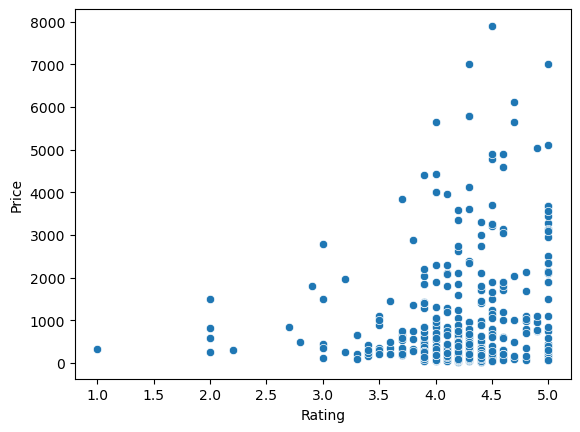

In [9]:
# Comparing Product and vs Price
import seaborn as sns
sns.scatterplot(x='Rating', y='Price',data=df_clean)

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

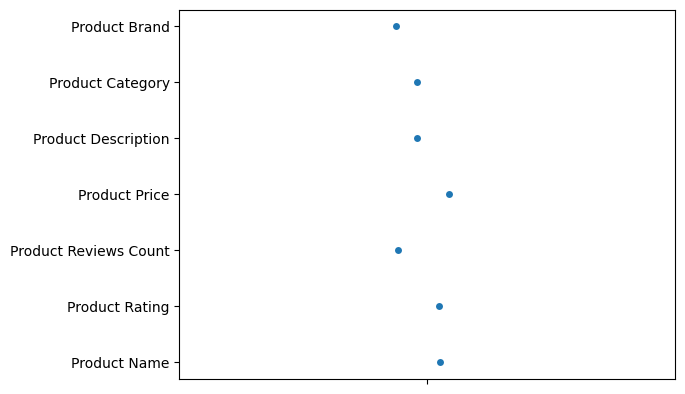

In [10]:
sns.stripplot(data=columns_to_keep)

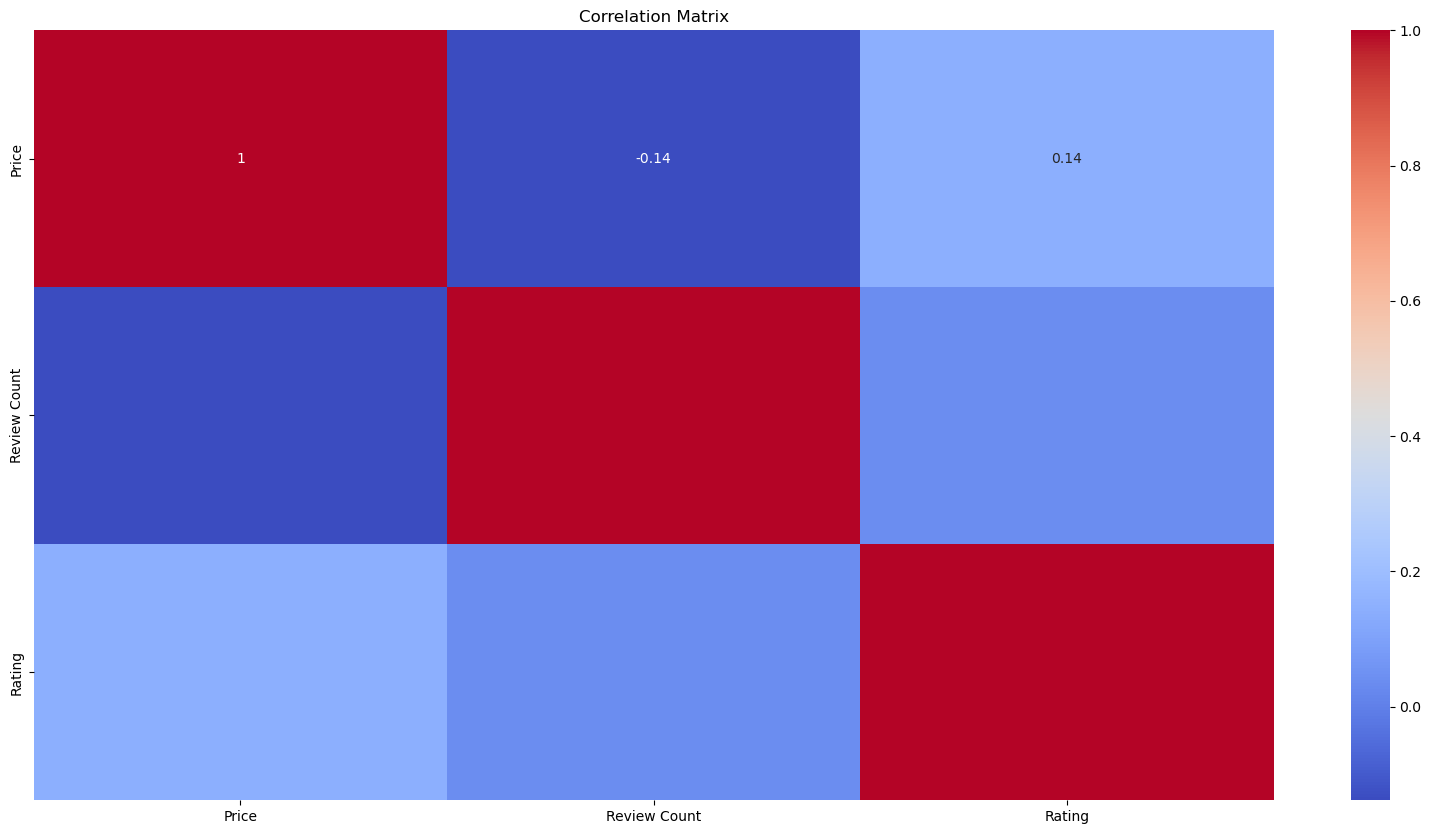

In [11]:
#correlation matrix
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Review Count', 'Rating']
correlation_matrix =df_clean[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Product Price and Product Reviews Count show a slight positive correlation, suggesting that more expensive products tend to have more reviews.
Product Rating does not show a strong correlation with either Product Price or Product Reviews Count, indicating that high ratings are distributed across different price ranges and review counts.

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


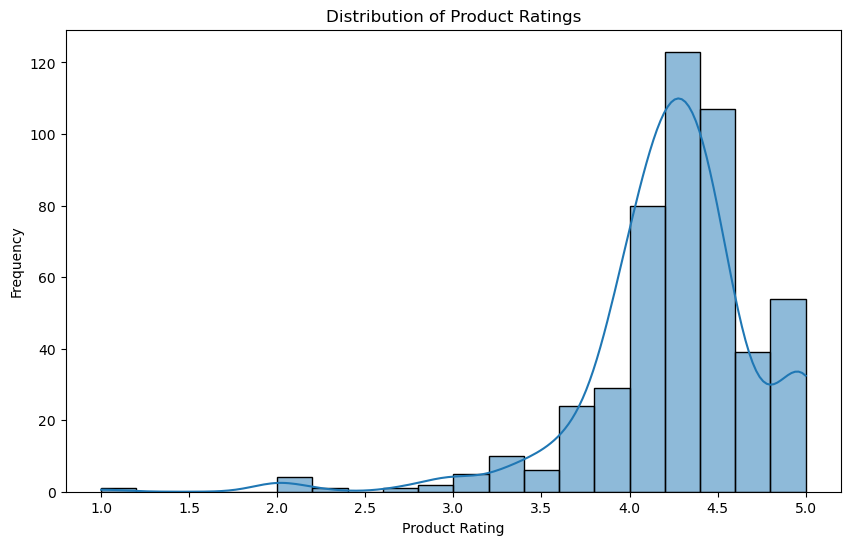

In [12]:
#distribuion of product ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Rating'], bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.show()

### Most products have ratings between 4 and 5, indicating generally high customer satisfaction

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


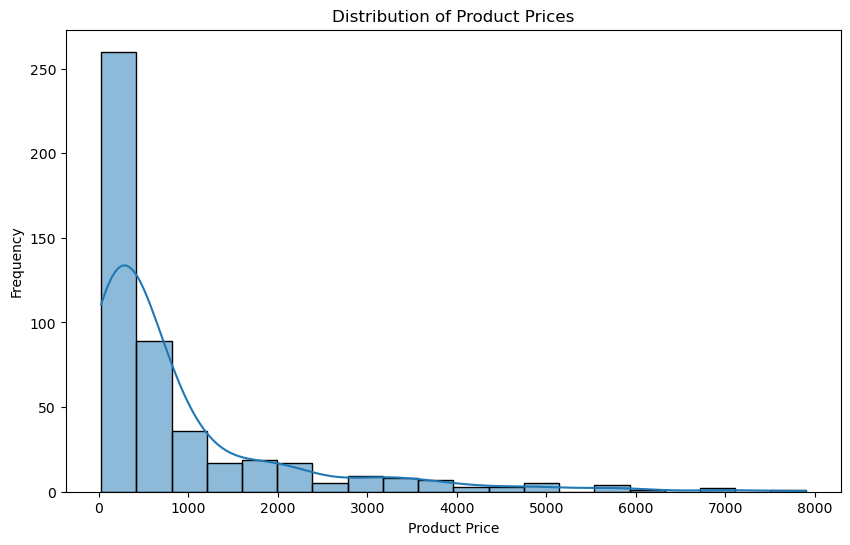

In [13]:
#Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

### The majority of products are priced below 2000 INR, with a few high-end products priced above 5000 INR

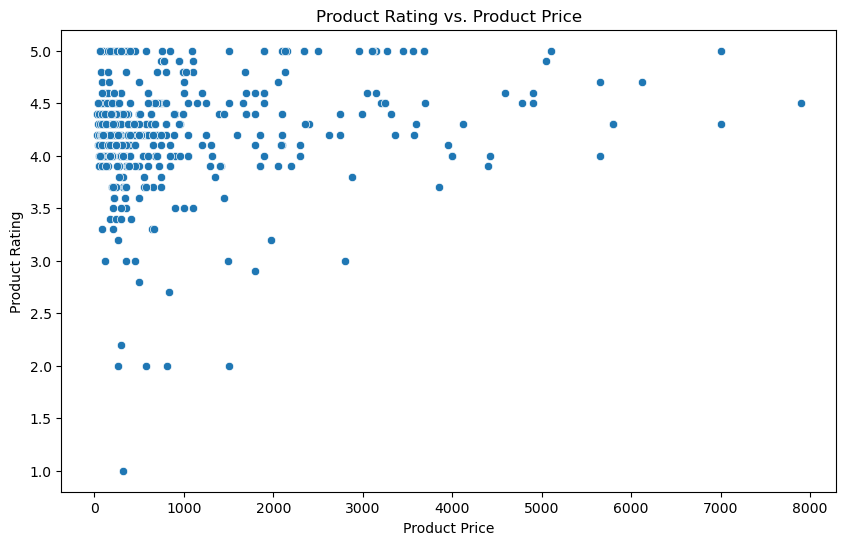

In [14]:
#Distribution between product rating and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df_clean)
plt.title('Product Rating vs. Product Price')
plt.xlabel('Product Price')
plt.ylabel('Product Rating')
plt.show()

#### Higher-priced products (above 2000 INR) generally have ratings above 4.0, indicating that customers are satisfied with the quality of these products

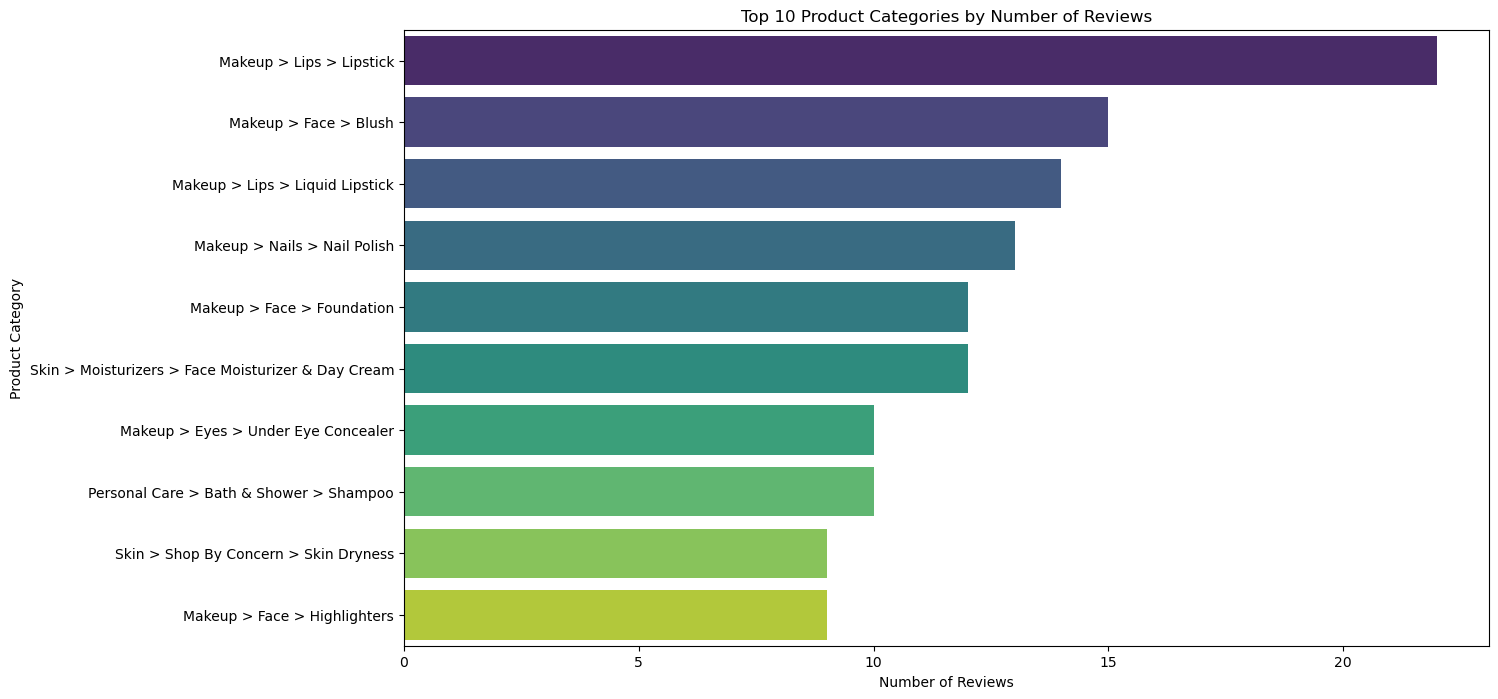

In [15]:
#Top 10 brands
plt.figure(figsize=(14, 8))
top_categories = df_clean['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.show()

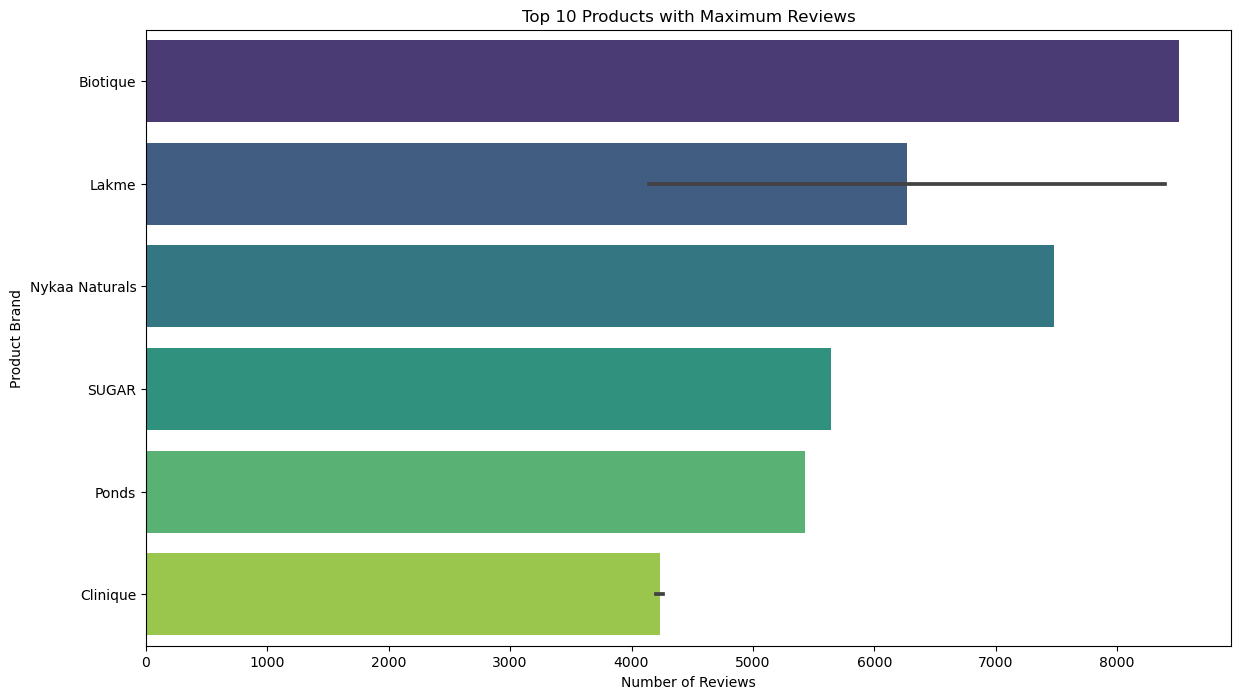

In [16]:
top_10_reviews =df_clean.sort_values(by='Review Count', ascending=False).head(10)

#top 10 products with maximum reviews
plt.figure(figsize=(14, 8))
sns.barplot(x='Review Count', y='Brand', data=top_10_reviews, palette='viridis')
plt.title('Top 10 Products with Maximum Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Brand')
plt.show()

C:\Users\nafis\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


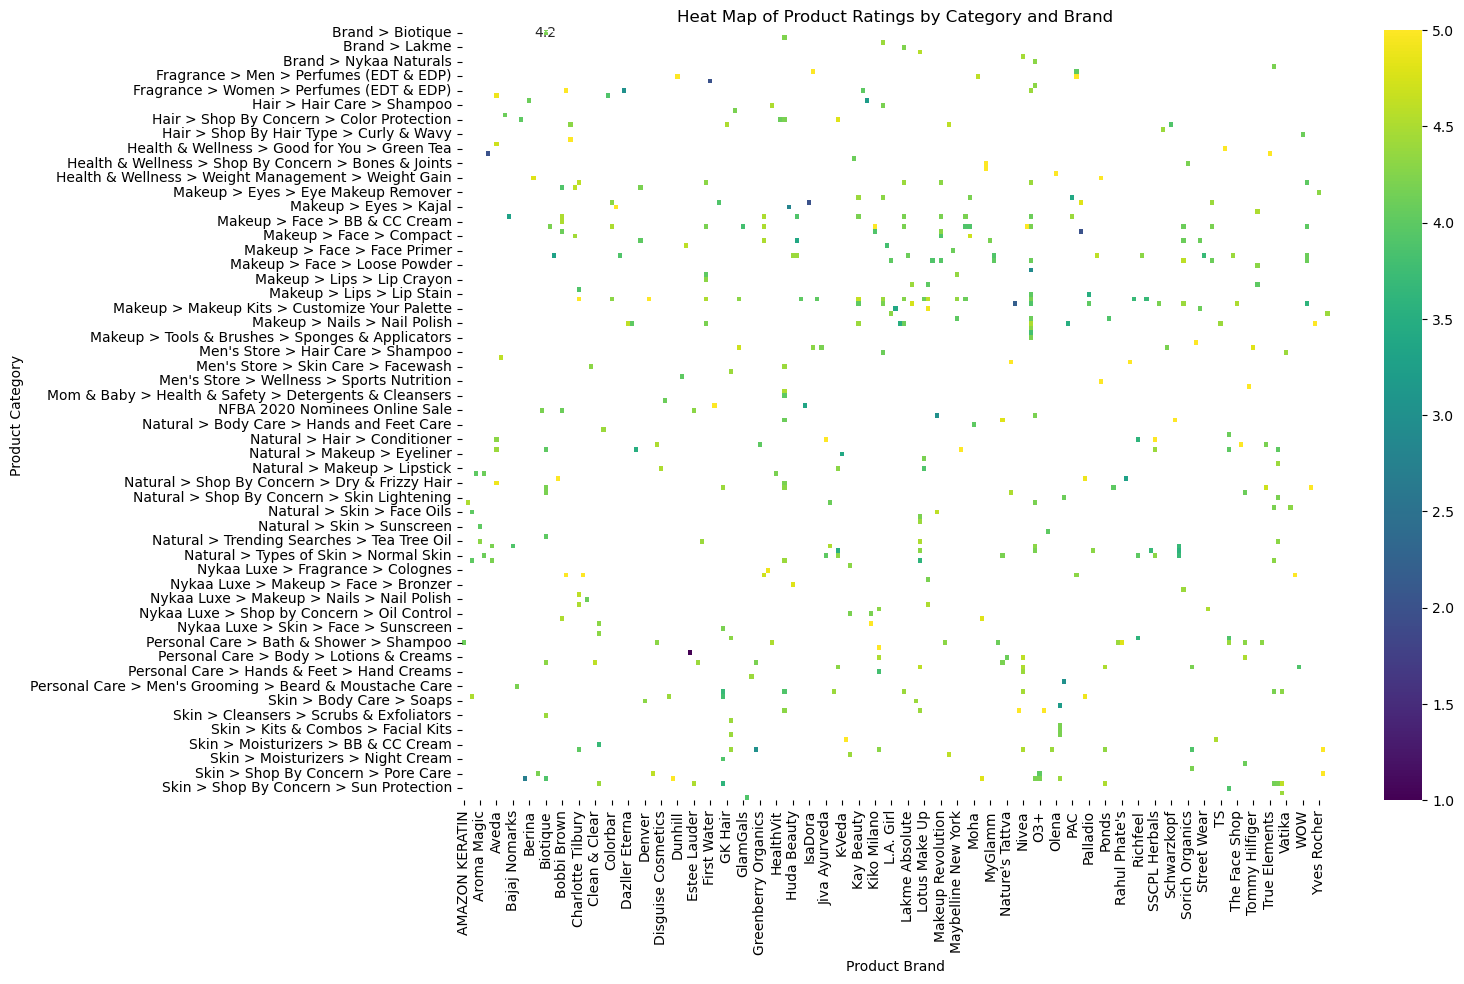

In [83]:
#Product ratings by category
plt.figure(figsize=(14, 10))
heatmap_data = df_clean.pivot_table(values='Rating', index='Category', columns='Brand', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True)
plt.title('Heat Map of Product Ratings by Category and Brand')
plt.xlabel('Product Brand')
plt.ylabel('Product Category')
plt.show()

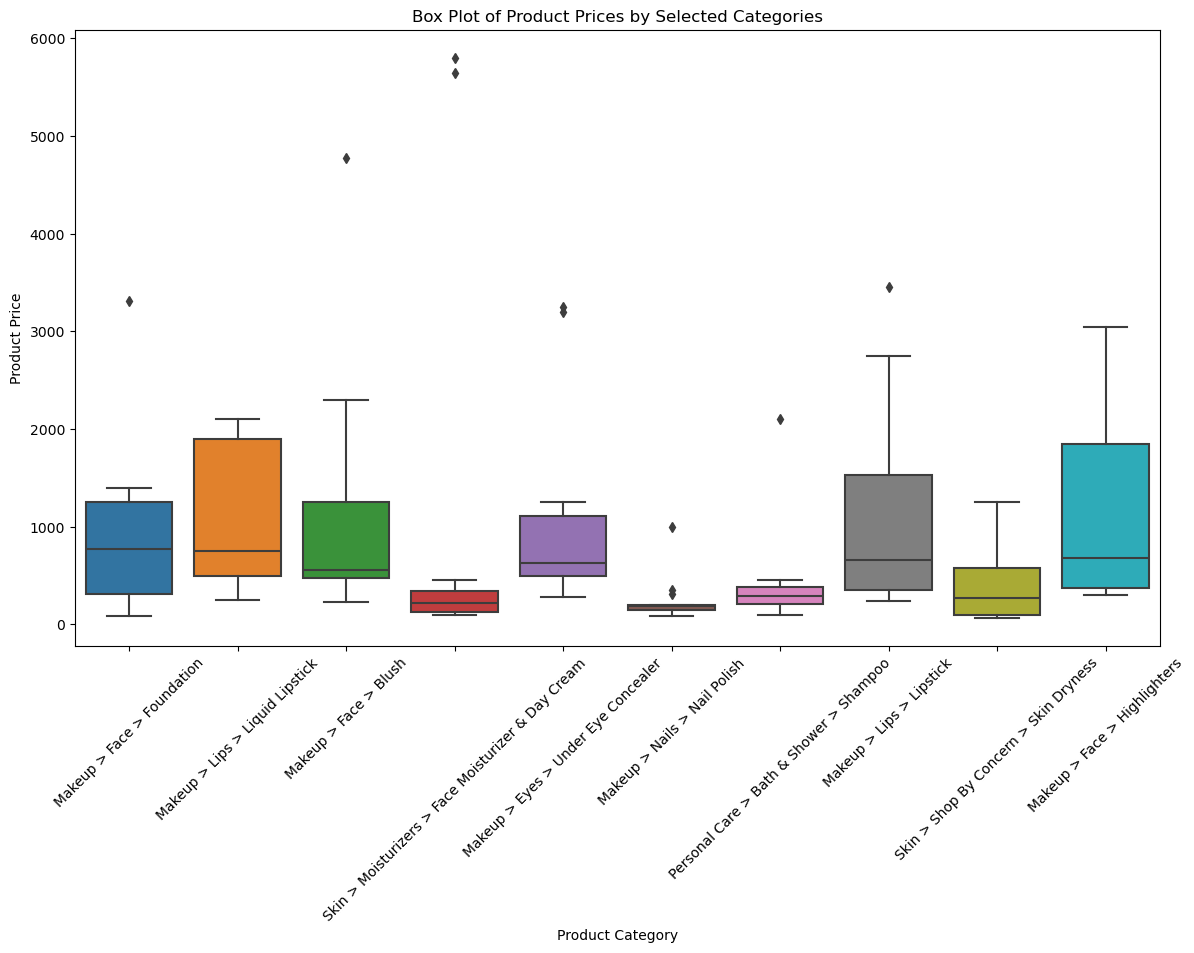

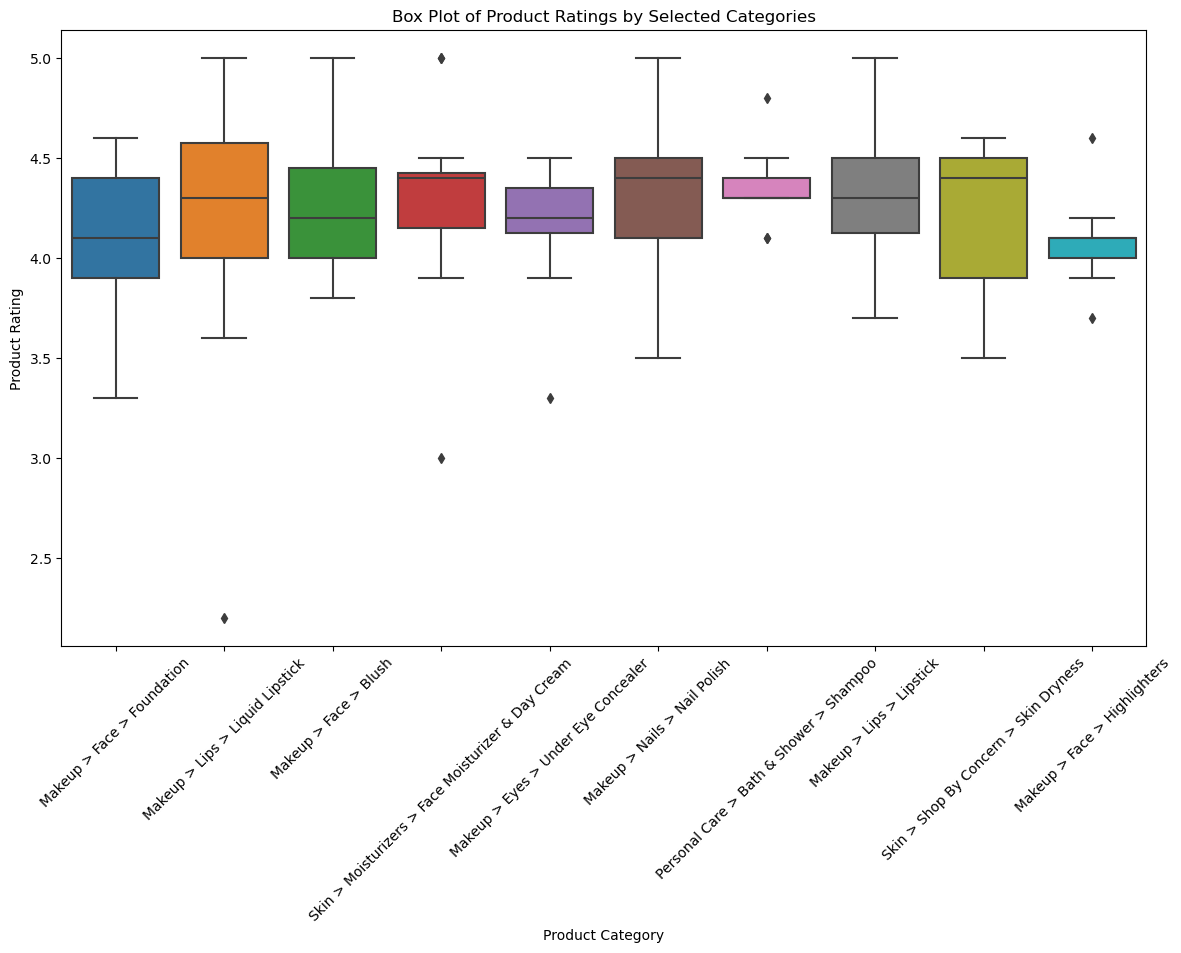

In [18]:
# Select top 10 categories by number of products
top_categories =df_clean['Category'].value_counts().head(10).index

# Filter the dataset
filtered_data =df_clean[df_clean['Category'].isin(top_categories)]

# Box Plot of Product Prices by Selected Categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Price',data=filtered_data)
plt.xticks(rotation=45)
plt.title('Box Plot of Product Prices by Selected Categories')
plt.xlabel('Product Category')
plt.ylabel('Product Price')
plt.show()

# Box Plot of Product Ratings by Selected Categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Box Plot of Product Ratings by Selected Categories')
plt.xlabel('Product Category')
plt.ylabel('Product Rating')
plt.show()


### Product Prices: Certain categories like "Perfume" and "Foundation" have higher median prices, whereas categories like "Lip Balm" and "Shampoo" have lower median prices.
Product Ratings: Ratings are generally high across categories, with some variation.

## Model Evaluation

#### Evaluating models and choosing the best model..

In [99]:
# Splitting and Training the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for linear regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

# Split the data into training and testing sets for logistic regression and SVM
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [100]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lr, y_train_lr)

# Predict on the test set
y_pred_lin = lin_reg.predict(X_test_lr)

# Evaluate the model
mse_lin = mean_squared_error(y_test_lr, y_pred_lin)
r2_lin = r2_score(y_test_lr, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}, R2: {r2_lin}')


Linear Regression MSE: 8.049601073683793e-33, R2: 1.0


In [101]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
acc_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {acc_log}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9387755102040817
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       0.93      1.00      0.96        80

    accuracy                           0.94        98
   macro avg       0.97      0.83      0.88        98
weighted avg       0.94      0.94      0.93        98



In [102]:
# SVM Model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9387755102040817

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        18
           1       0.93      1.00      0.96        80

    accuracy                           0.94        98
   macro avg       0.97      0.83      0.88        98
weighted avg       0.94      0.94      0.93        98



## We chose the SVM model because it effectively handles complex data and provides efficient classification performance

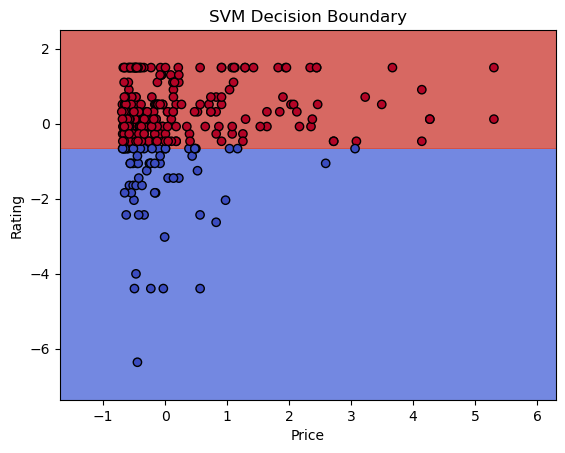

In [103]:
import numpy as np

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Define the range of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Price')
    plt.ylabel('Rating')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the decision boundary for training data
plot_decision_boundary(svm_model, X_train, y_train)

C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\4181289732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Recommended'] = np.where(df_clean['Rating'] >= 4, 1, 0)


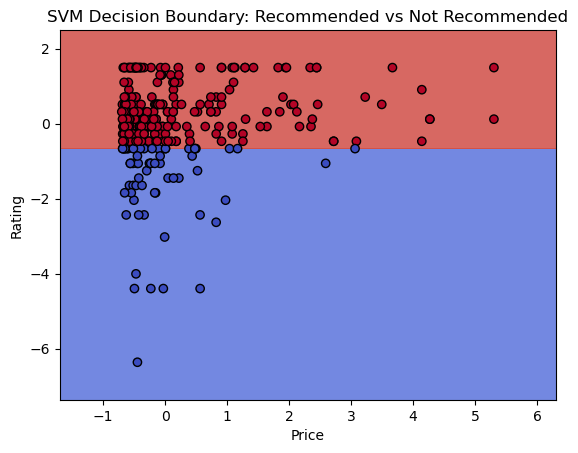

In [104]:
# Generate a binary target based on the Rating (e.g., 1 if Rating >= 4, else 0)
df_clean['Recommended'] = np.where(df_clean['Rating'] >= 4, 1, 0)

# Features and target variable
X = df_clean[['Price', 'Rating']]
y = df_clean['Recommended']

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Define the range of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Price')
    plt.ylabel('Rating')
    plt.title('SVM Decision Boundary: Recommended vs Not Recommended')
    plt.show()
    

# Plot the decision boundary for the training data
plot_decision_boundary(svm_model, X_train, y_train)

## Function for Product Recommendation

In [105]:
def recommend_top_products(brand, top_n=10):
    # Filter products based on brand
    filtered_df = df_clean[df_clean['Brand'].str.lower() == brand.lower()]
    
    # Standardize the filtered data
    filtered_X = scaler.transform(filtered_df[['Price', 'Rating']])
    
    # Predict recommendations
    filtered_df['Recommendation_Score'] = svm_model.decision_function(filtered_X)
    
    # Sort by recommendation score
    top_products = filtered_df.sort_values(by='Recommendation_Score', ascending=False).head(top_n)
    
    return top_products[['Name', 'Brand', 'Price', 'Rating', 'Recommendation_Score']]

# Example usage
brand_input = input("Enter the brand: ")
top_products = recommend_top_products(brand_input)

print("\nTop Recommended Products:\n", top_products)

Enter the brand:  Himalaya



Top Recommended Products:
                                                   Name     Brand  Price  \
24                     Himalaya Gentle Baby Wipes 12's  Himalaya   44.0   
605              Himalaya Men Daily Nourish Hair Cream  Himalaya   41.0   
217              Himalaya Herbals Soothing Body Lotion  Himalaya   72.0   
380   Himalaya Herbals Gentle Exfoliating Walnut Scrub  Himalaya   64.0   
64               Himalaya Natural Glow Kesar Face Wash  Himalaya   60.0   
580         Himalaya Herbals Refreshing Cleansing Milk  Himalaya   84.0   
331   Himalaya Herbals Dryness Defense Protein Shampoo  Himalaya   68.0   
541      Himalaya Herbals Tan Removal Orange Face Wash  Himalaya   67.0   
436  Himalaya Herbals Clear Complexion Whitening Fa...  Himalaya   64.0   
512  Himalaya Herbals Dryness Defense Detangler And...  Himalaya   90.0   

     Rating  Recommendation_Score  
24      4.5              5.998978  
605     4.5              5.998978  
217     4.4              4.999167  
38

C:\Users\nafis\AppData\Local\Temp\ipykernel_31172\1081379934.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recommendation_Score'] = svm_model.decision_function(filtered_X)
